In [1]:
from skimage import feature
from skimage import color
from skimage import segmentation

from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import skimage
import skimage.io
import matplotlib.pylab as plt

%matplotlib inline
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

def dialate(image):
    # Convert to float: Important for subtraction later which won't work with uint8
    #image = skimage.io.imread('./photodb3/lat37.758877_lng-122.414508ang045_61137.png', as_grey=True)
    image = gaussian_filter(image, 3)
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    dilated = reconstruction(seed, mask, method='dilation')
    return dilated

In [2]:
df = pd.read_csv('latlongneighborhood.csv')

filenames = df['filename']
y = df['label']
# df_latlng = df3['Business_Location'].map(lambda x: str(x).split()[-2:])
#     df_lat = df_latlng.map(lambda x: x[0][1:-1])
#     df_lng = df_latlng.map(lambda x: x[-1][0:-1])
#     df_latlng = pd.concat([df_lat,df_lng],1)
#     df_latlng.columns = ['lat', 'lng']
#     df = df_latlng.convert_objects(convert_numeric=True)

In [3]:
df

,Unnamed: 0,lat,lng,filename,label
0,0,37.785325,-122.419583,lat37.785325_lng-122.419583ang045_185.png,0
1,1,37.785468,-122.421236,lat37.785468_lng-122.421236ang045_3638.png,0
2,2,37.785553,-122.422226,lat37.785553_lng-122.422226ang045_2821.png,0
3,3,37.785624,-122.421694,lat37.785624_lng-122.421694ang135_5072.png,0
4,4,37.785746,-122.419669,lat37.785746_lng-122.419669ang045_1747.png,0
5,5,37.785808,-122.420653,lat37.785808_lng-122.420653ang045_3729.png,0
6,6,37.785828,-122.420523,lat37.785828_lng-122.420523ang135_3504.png,0
7,7,37.785848,-122.420393,lat37.785848_lng-122.420393ang135_2806.png,0
8,8,37.785858,-122.420293,lat37.785858_lng-122.420293ang225_4971.png,0
9,9,37.786108,-122.419743,lat37.786108_lng-122.419743ang045_2357.png,0


In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
from os import listdir
from os.path import isfile, join
import itertools, shutil, os
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def createarray(filepath):
    p = skimage.io.imread(filepath)
    pgray = color.rgb2gray(p)
    X = pgray
    X = feature.canny(pgray,sigma=2)
#    X = dialate(pgray)
#     X = skimage.transform.resize(X,[100,100])
    return X.flatten()

# read images
features_array = []
dirpath = './photodb6/'
nn=0
rands = np.random.random_integers(0,1500,100)
domain = filenames # [filenames[i] for i in rands]
for i,f in enumerate(domain):
    if i%25 == 0:print(i,f)
    if isfile(join(dirpath,f)) & (len(f)>=31):
        temp = createarray(dirpath +f)
        if len(temp)>1:
            features_array.append(temp)
features_array = np.array(features_array)    
print('read_images done')


# features_array = features_array*0.99
pca = PCA(n_components=5000)
feature_pca = pca.fit_transform(features_array)

(0, 'lat37.785325_lng-122.419583ang045_185.png')
(25, 'lat37.786903_lng-122.419560ang225_2704.png')
(50, 'lat37.787575_lng-122.420090ang315_449.png')
(75, 'lat37.788304_lng-122.420175ang045_667.png')
(100, 'lat37.789273_lng-122.420453ang045_4126.png')
(125, 'lat37.790134_lng-122.420633ang315_3329.png')
(150, 'lat37.790971_lng-122.420725ang225_648.png')
(175, 'lat37.792316_lng-122.421846ang135_834.png')
(200, 'lat37.793057_lng-122.419465ang315_28.png')
(225, 'lat37.793643_lng-122.421258ang315_1665.png')
(250, 'lat37.794313_lng-122.423022ang135_3747.png')
(275, 'lat37.794958_lng-122.422373ang225_2877.png')
(300, 'lat37.795248_lng-122.420133ang315_1543.png')
(325, 'lat37.796577_lng-122.423466ang045_2478.png')
(350, 'lat37.797044_lng-122.422023ang225_2702.png')
(375, 'lat37.797733_lng-122.422676ang135_3547.png')
(400, 'lat37.798588_lng-122.422256ang135_2256.png')
(425, 'lat37.799094_lng-122.419717ang045_4247.png')
(450, 'lat37.799886_lng-122.422516ang315_3802.png')
(475, 'lat37.800683_lng-

/Users/alizaf/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [5]:
join(dirpath,f)

'./photodb6/lat37.804493_lng-122.406605ang225_4705.png'

In [10]:
import pdb
import pandas as pd

silhouette_avgarr = []
n_cluster_rng = range(2,9)
for n in n_cluster_rng:
    #for i in features_array:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(feature_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features_array*1., cluster_labels)
    silhouette_avgarr.append(silhouette_avg)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)


('For n_clusters =', 2, 'The average silhouette_score is :', 0.10256927072720473)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.020902593906343601)
('For n_clusters =', 4, 'The average silhouette_score is :', -0.011640633259173465)
('For n_clusters =', 5, 'The average silhouette_score is :', -0.021492110072035681)
('For n_clusters =', 6, 'The average silhouette_score is :', -0.020977065764009824)
('For n_clusters =', 7, 'The average silhouette_score is :', -0.0075961185511842638)
('For n_clusters =', 8, 'The average silhouette_score is :', -0.03251775337609937)


/Users/alizaf/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: ./photodb6/b7/lat37.796602_lng-122.416482ang225_2726.png is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/alizaf/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: ./photodb6/b7/lat37.796690_lng-122.415840ang225_4389.png is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/alizaf/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: ./photodb6/b7/lat37.796905_lng-122.414246ang135_2314.png is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/alizaf/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: ./photodb6/b7/lat37.796924_lng-122.414107ang135_5148.png is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/alizaf/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: ./photodb6/b7/lat37.79182

8
write_images done


/Users/alizaf/anaconda/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: ./photodb6/b7/lat37.792399_lng-122.407587ang225_5054.png is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)


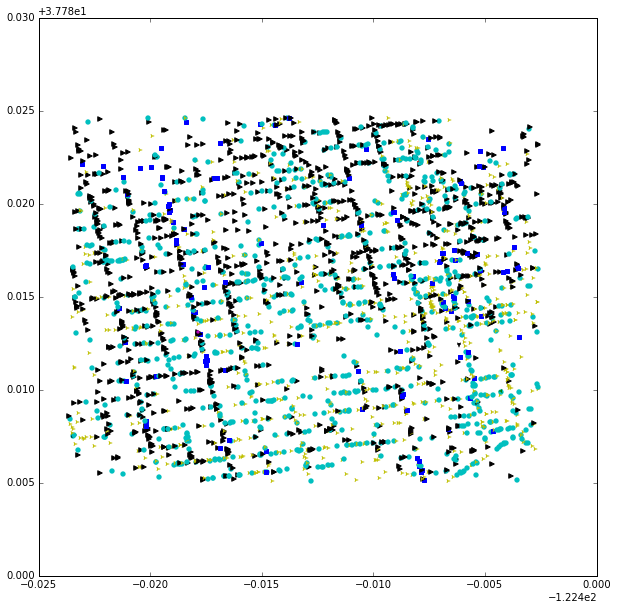

In [12]:
n_min =8#np.argmin(np.abs(np.array(silhouette_avgarr)))+2
print(n_min)

clusterer = KMeans(n_clusters=n_min, random_state=10)
cluster_labels = clusterer.fit_predict(feature_pca)
#dirpath = './mesh/7x8of10x10/'
for i in range (0,n_min):
    if os.path.exists(dirpath+'b'+str(i)):
        shutil.rmtree(dirpath+'b'+str(i))
    os.mkdir(dirpath+'b'+str(i))
filenames = []
for f in domain:
    if isfile(join(dirpath,f)) & (len(f)>=31):
        filenames.append(f)
i = 0

for (ii,f) in enumerate(domain):
    if (isfile(join(dirpath,f))) & (len(f)>=31):
        skimage.io.imsave(dirpath+'b'+str(cluster_labels[ii])+'/'+f,1.*features_array[ii].\
                          reshape(400,300,1))
print('write_images done')
#function that gets list of file names and return dataframe with lat lng as columns


def filenameplot(filenames,label, plot = 1):
    latlist = [float(filenames[i][3:12]) for i in range(len(filenames))]
    lnglist = [float(filenames[i][16:27]) for i in range(len(filenames))]
    df = pd.DataFrame(np.transpose([latlist, lnglist,label]), columns=['lat','lng','label'])
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 10)) 
#     ax1.axis('off')
#     ax1.set_title('noisy image', fontsize=20)
    col = 'kbrgycmkbrgycmycmk'
    markers= '1,2348.><ov12348'
    if plot == 1:
        for j in range(df.shape[0]):
            dftemp = df#df[df['label']==cluster_labels[j]]
            ax1.scatter(dftemp['lng'][j],dftemp['lat'][j],color=col[cluster_labels[j]], \
            marker= markers[cluster_labels[j]])
#             ax1.imshow(features_array[3].reshape(100,100), cmap=plt.cm.jet)
    return df
def filenameplot_seperate(filenames,label, plot = 1):
    latlist = [float(filenames[i][3:12]) for i in range(len(filenames))]
    lnglist = [float(filenames[i][16:27]) for i in range(len(filenames))]
    df = pd.DataFrame(np.transpose([latlist, lnglist,label]), columns=['lat','lng','label'])
    col = 'kbrgycmkbrgycm'
    markers= '1,2348.><ov12348'
    if plot == 1:
        for i in range(n_min):
            dftemp = df#df[df['label']==cluster_labels[j]]
            df[df['label']==i].plot('lng','lat',kind='scatter',s = 0.3, figsize= [5,5])
    return df


df = filenameplot(filenames,cluster_labels, plot = 1)



In [ ]:
len(cluster_labels)

In [ ]:
df = filenameplot_seperate(filenames,cluster_labels, plot = 1)

In [ ]:
len(cluster_labels)

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_curve
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
X = feature_pca
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [9]:
print "score:", rf.score(X_test, y_test)

y_predict = rf.predict(X_test)
print "confusion matrix:"
print confusion_matrix(y_test, y_predict)
print "precision:", precision_score(y_test, y_predict)
print "recall:", recall_score(y_test, y_predict)



score: 0.180572851806
confusion matrix:
[[ 0  0  4  1  0  0  0  3  0  0  0  0  0  0  4  0  0  4  2  0  0  1  4  1
   0]
 [ 0  4  1  3  0  0  0  0  1  0  0  0  1  0  3  1  0  0  1  1  0  2  0  3
   0]
 [ 0  0  8  3  0  1  1  1  0  0  1  0  0  1  5  0  0  0  2  2  0  0  5  1
   0]
 [ 0  0  2 10  1  1  2  2  5  0  0  0  6  1  4  1  0  1  5  1  0  0  3  3
   0]
 [ 0  0  2  1  0  0  0  2  0  0  0  0  1  0  0  0  0  3  0  1  0  0  1  0
   0]
 [ 0  1  4  0  0  9  1  1  1  0  0  0  2  0  1  0  0  4  2  2  2  2  5  1
   0]
 [ 0  0  3  1  0  2  4  2  0  0  0  0  1  0  5  0  0  3  8  2  0  0  6  1
   0]
 [ 0  0  3  3  0  4  0  3  1  0  0  0  3  0  6  1  0  2  2  2  1  1  3  2
   0]
 [ 0  1  1  2  0  0  0  0  2  0  1  0  0  1  3  0  0  1  2  3  1  0  2  1
   0]
 [ 1  0  3  0  0  0  0  0  0  1  0  0  1  0  5  0  0  3  2  1  0  0  2  0
   0]
 [ 2  1  3  0  0  1  0  1  0  0 12  0  3  1  3  1  0  2  2  1  2  1  5  3
   0]
 [ 1  0  0  0  0  1  0  1  1  0  1  1  2  1  2  0  0  0  1  1  0  0  5  0
   0]


In [91]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices
nbrs.

array([[   0,  799,  273,  794],
       [   1,  799,  273,  794],
       [   2,  799,  273,  794],
       ..., 
       [1530,  799,  273,  794],
       [1531,  799,  273,  794],
       [1532,  273,  799,  794]])

In [48]:
df = filenameplot(filenames,cluster_labels, plot = 1)

(100, 120000)

In [56]:
len(filenames)

100

In [2]:
import numpy as np, matplotlib.pyplot as plt, scipy.stats as stats

x = np.random.random_integers(1,50,50)
y = np.random.random_integers(1,50,50)

r2 = stats.linregress(x, y) [3]**2
print r2

plt.scatter(x, y)

plt.show()

0.853169483718
